# 현미경개론 HW-5

## 1. 푸리에 변환

$$
f(x) = 
\begin{cases}
1, & \text{if } 1 \leq x \leq 2 \\
0, & \text{otherwise}
\end{cases}
$$

이 함수의 푸리에 변환 $F(x)$를 구하고, 그래프로 그리시오.

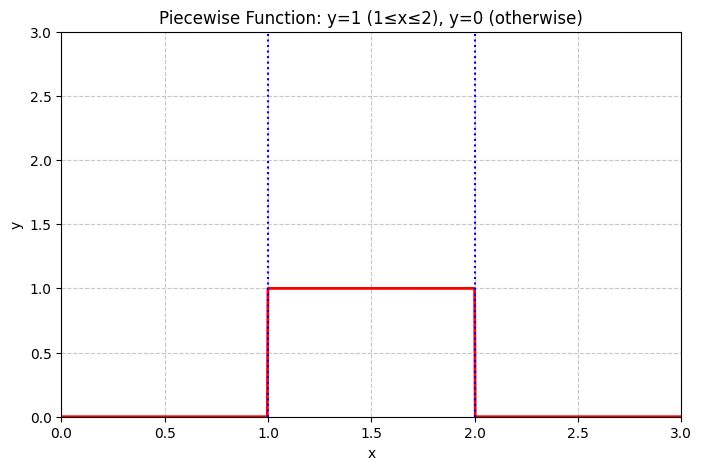

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# x 범위 설정 (0~3, 1000개 점)
x = np.linspace(0, 3, 1000)

# 조건별 함수 정의
conditions = [
    (x >= 1) & (x <= 2),  # 1 ≤ x ≤ 2 → y=1
    (x < 1) | (x > 2)     # 그 외 → y=0
]

values = [1, 0]

# piecewise 함수 적용
y = np.piecewise(x, conditions, values)

# 플롯 설정
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'r-', linewidth=2)
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Piecewise Function: y=1 (1≤x≤2), y=0 (otherwise)')
plt.xlabel('x')
plt.ylabel('y')

# 구간 경계선 추가
plt.axvline(x=1, color='blue', linestyle=':', linewidth=1.5)
plt.axvline(x=2, color='blue', linestyle=':', linewidth=1.5)

plt.show()


이 함수에 푸리에 변환을 적용해보자.

푸리에 변환은 다음과 같다.
$$
F(k) = \int_{-\infty}^{\infty} f(x) e^{-2ik\pi x} \, dx
$$

주어진 조건은 $1 \leq x \leq 2$에서 $f(x)=1$이므로 식은 적분 조건은 1에서 2이며 식은 다음과 같다.

$$
\begin{aligned}
F(k) &= \int_{1}^{2}e^{-2ik\pi x} \, dx \\\\
&= -\frac{1}{2ik\pi}\left|e^{-2ik\pi x}\right|_{1}^{2} \\\\
&= -\frac{e^{-4ik\pi}-e^{-2ik\pi}}{2ik\pi} \\\\
&= \frac{e^{-3ik\pi}}{k\pi}\left(\frac{e^{ik\pi}-e^{-ik\pi}}{2i}\right)\\\\
&= e^{-3ik\pi}\left(\frac{\sin{ik}}{k\pi}\right)\\\\
&= e^{-3ik\pi}\text{sinc }{k\pi}
\end{aligned}
$$

k=0일 때는 분모가 0이 되므로, 직접 적분해주면

$$
\begin{aligned}
F(0) &= \int_{1}^{2}1dx\\\\
&= 2-1 =1
\end{aligned}
$$

따라서 푸리에 변환 결과는 
$$
F(k) = 
\begin{cases}
e^{-3ik\pi}\text{sinc }{k\pi}, & k\ne 0\\
1, & k = 0
\end{cases}


이를 범위 $a \leq x \leq b$ 에서 일반화 해보자. 식은 다음과 같다.

$$
f(x) = 
\begin{cases}
1, & \text{if } a \leq x \leq b \\
0, & \text{otherwise}
\end{cases}
$$

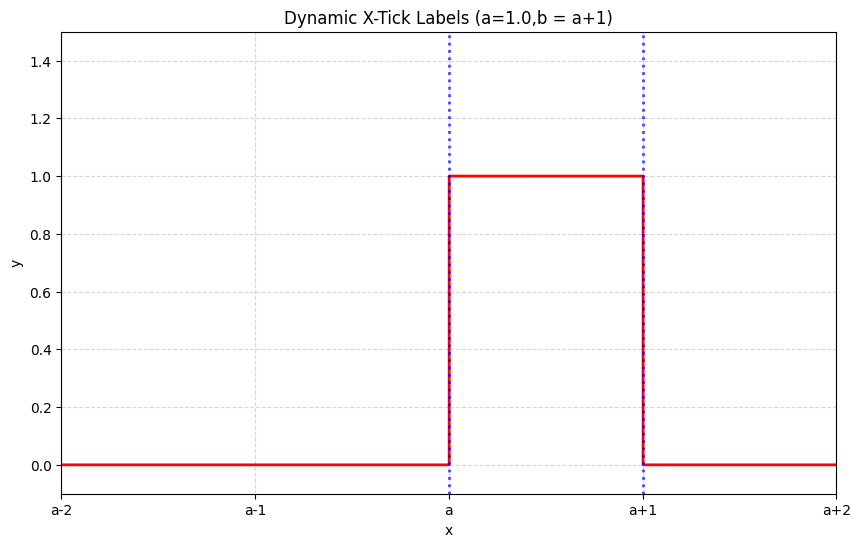

In [ ]:

def generate_xtick_labels(a, xticks):
    labels = []
    for x in xticks:
        diff = int(x - a)  # a와의 차이 계산 (정수 단위)
        if diff == 0:
            labels.append('a')
        elif diff > 0:
            labels.append(f'a+{diff}')
        else:
            labels.append(f'a{diff}')  # 음수는 a-1, a-2 등으로 표현
    return labels

# 변수 설정
a = 1.0
b = 2.0
L = b-a

num_ticks = 5  # a 좌우로 생성할 눈금 수 (5 -> a-2, a-1, a, a+1, a+2)

# x 범위 및 눈금 설정
xticks = np.arange(a - (num_ticks//2), a + (num_ticks//2) + 1, 1)
x = np.linspace(xticks[0], xticks[-1], 1000)

# 조건별 함수 정의
conditions = [
    (x >= a) & (x <= (b)),  # a ≤ x ≤ a+1
    (x < a) | (x > (b))
]
values = [1, 0]
y = np.piecewise(x, conditions, values)

# 플롯 설정
plt.figure(figsize=(10, 6))
plt.step(x, y, where='post', color='r', linewidth=2)

# 동적 레이블 적용
plt.xticks(xticks, generate_xtick_labels(a, xticks))
plt.xlim(xticks[0], xticks[-1])

# 기타 설정
plt.ylim(-0.1, 1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title(f'Dynamic X-Tick Labels (a={a},b = a+{int(L)})', fontsize=12)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)

# 구간 경계선 추가
plt.axvline(x=a, color='blue', linestyle=':', linewidth=2, alpha=0.7)
plt.axvline(x=b, color='blue', linestyle=':', linewidth=2, alpha=0.7)

plt.show()


이를 푸리에 변환하면 다음과 같다.

주어진 조건은 $a \leq x \leq b$에서 $f(x)=1$이므로 식은 적분 조건은 1에서 2이며 식은 다음과 같다.

$$
\begin{aligned}
F(k) &= \int_{a}^{b}e^{-2ik\pi x} \, dx \\\\
&= -\frac{1}{2ik\pi}\left|e^{-2ik\pi x}\right|_{a}^{b} \\\\
&= \frac{e^{-2ik\pi b}-e^{-2ik\pi a}}{2ik\pi} \\\\
\end{aligned}
$$
이 때 중심점 $c= \frac{a+b}{2}$ 과 구간길이 $L=b-a$ 로 정의하면 위 식의 지수항은 각각
$$
\begin{aligned}
e^{-2ik\pi b} &= e^{-2ik\pi\left({c+\frac{L}{2}}\right)}=e^{-2ik\pi c}\cdot e^{-ik\pi L}\\\\
e^{-2ik\pi a} &= e^{-2ik\pi\left({c-\frac{L}{2}}\right)}=e^{-2ik\pi c}\cdot e^{ik\pi L}
\end{aligned}
$$
이 되고, $e^{-2ik\pi c}$ 로 묶어줄 수 있다.

$$
\begin{aligned}
F(k)&= \frac{e^{-2ik\pi c}}{k\pi}\left(\frac{e^{ik\pi L}-e^{-ik\pi L}}{2i}\right)\\\\
&= \frac{e^{-2ik\pi c}}{k\pi}\left(\sin{k\pi L}\right)\\\\
\end{aligned}
$$

이 때 싱크함수의 정의 $\text{sinc }x \equiv \cfrac{\sin{\pi x}}{\pi x}$ 에 의해 위 식은 다음과 같이 쓸 수 있다.

$$
\begin{aligned}
F(x)&= \left(e^{-2ik\pi c}\cdot L\right)\frac{\sin{k\pi L}}{k\pi L}\\\\
&=Le^{-2ik\pi c}\text{sinc }kL
\end{aligned}
$$

$k=0$일 때 분모가 0이 되면 안되므로, 직접 적분하면 다음과 같다.

$$
\begin{aligned}
F(0)&= \int_{a}^{b}1 \, dx \\\\
&=b-a\\\\
&=L
\end{aligned}
$$

$c=\frac{b-a}{2}, L = b-a$ 이므로 사각함수의 푸리에 변환은 다음과 같이 $a, b$ 로 표현하여 일반화 할 수 있다.

$$
F(k) = 
\begin{cases}
(b-a)e^{-2ik\pi \frac{b-a}{2}}\text{sinc }k(b-a), & k \ne 0 \\
b-a, & k = 0
\end{cases}
$$

<>:39: SyntaxWarning: invalid escape sequence '\p'
<>:39: SyntaxWarning: invalid escape sequence '\p'
/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/391250489.py:39: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f'Phase: $e^{{-2\pi i k \\cdot {(a+b)/2}}}$')


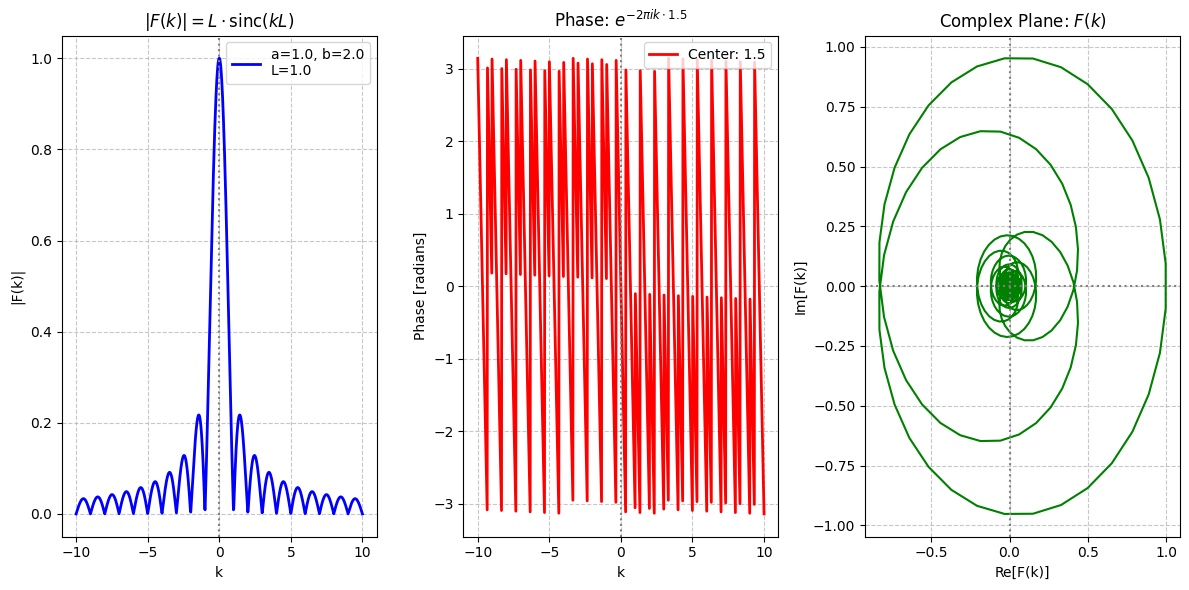

In [374]:
# 변수 설정
# a = 1.0   # 구간 시작점
# b = 2.0   # 구간 끝점
# L = b - a # 구간 길이

# k축 설정 (a-2 ~ a+2 범위)
k = np.linspace(-10, 10, 1000)

# F(k) 계산 (k=0 처리 포함)
mask = (k == 0)  # k=0 위치 마스크
F = np.zeros_like(k, dtype=complex)
F[mask] = L  # k=0일 때 값
F[~mask] = L * np.exp(-2j * np.pi * k[~mask] * (a + b)/2) * np.sinc(k[~mask] * L)

# 4. 크기 및 위상 분리
magnitude = np.abs(F)
phase = np.angle(F)
real = np.real(F)
imag = np.imag(F)


# 플롯 설정
plt.figure(figsize=(12, 6))

# 크기 스펙트럼
plt.subplot(1, 3, 1)
plt.plot(k, magnitude, 'b-', linewidth=2, label=f'a={a}, b={b}\nL={L:.1f}')
# plt.title(f'Magnitude: $|F(k)| = {L} \cdot \mathrm{{sinc}}(k \cdot {L})$')
plt.title(r'$|F(k)| = L \cdot \mathrm{sinc}(kL)$')  # 일반화된 공식
plt.xlabel('k')
plt.ylabel('|F(k)|')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle=':')  # k=0 강조
plt.legend(loc='upper right')  # 범례 추가

# 위상 스펙트럼
plt.subplot(1, 3, 2)
plt.plot(k, phase, 'r-', linewidth=2, label=f'Center: {(a+b)/2:.1f}')
plt.title(f'Phase: $e^{{-2\pi i k \\cdot {(a+b)/2}}}$')
plt.xlabel('k')
plt.ylabel('Phase [radians]')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle=':')
plt.legend(loc='upper right')

plt.subplot(1, 3, 3)
plt.plot(real, imag, 'g-')
plt.xlabel('Re[F(k)]')
plt.ylabel('Im[F(k)]')
plt.title('Complex Plane: $F(k)$')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')

plt.tight_layout()
plt.show()


## 2. 프라운호퍼 회절 시뮬레이션

### 평면파 / 구면파 광원 구현

평면파를 수학적으로 나타내면 다음과 같다.
$$
U(\vec{r}, t) = A\, e^{i(\vec{k} \cdot \vec{r} - \omega t + \varphi)}
$$

구면파를 수학적으로 나타내면 다음과 같다.
$$
U(\vec{r}, t) = \frac{A}{r}\, e^{i(k r - \omega t + \varphi)}
$$

여기서 $A$는 진폭, $\vec{k}$ 는 파수벡터, $\vec{r}$ 은 위치벡터, $\omega$ 는 각진동수, $t$는 시간, $\varphi$는 초기 위상이다.

구면파에서 거리는 직각좌표로 $ r = \sqrt{x^2 + y^2 + z^2} $ 로 표현할 수 있다.

이 때 초기위상이 0이고, 시간항을 제외한 공간적 분포의 평면파와 구면파는 $k=\frac{2\pi}{\lambda}$ 이므로 각각 다음과 같이 다시 쓸 수 있다.

$$
\begin{aligned}
U(\vec{r}) &= A\, e^{i\left(\frac{2\pi}{\lambda} (\hat{n} \cdot \vec{r})\right)},&&
U(\vec{r}) &= \frac{A}{r}\, e^{i\left(\frac{2\pi}{\lambda} r\right)}
\end{aligned}
$$


공간적으로 분포하는 평면파, 구면파 함수 정의

In [375]:
def create_plane_wave_yz(N, screen_size, wavelength, L1, dtype=np.complex64):
    """
    y-z 평면 기반 평면파 생성 (메모리 효율적)
    
    Parameters:
        N (int): y축 샘플링 수
        screen_size (float): 물리적 크기 [m]
        wavelength (float): 파장 [m] 
        L1 (float): 전파 거리 [m]
        x_position (float): 관찰할 x 위치 [m]
        dtype: 데이터 타입
        
    Returns:
        plane_wave_yz (np.array): y-z 평면 파형 [Ny, Nz]
        plane_wave_L1 (np.array): L1에서의 파면 [Nx, Ny] 
        y, z (np.array): y, z 좌표
        X_L1, Y_L1 (np.array): L1에서의 x, y 좌표계
    """
    
    # 좌표 설정
    y = np.linspace(-screen_size/2, screen_size/2, N)
    Nz = int(N * (L1 / screen_size))
    z = np.linspace(0, L1, Nz)
    
    # y-z 평면 파형 계산 (x=x_position에서)
    Y_yz, Z_yz = np.meshgrid(y, z, indexing='ij')
    k = 2 * np.pi / wavelength
    
    # 평면파: exp(ikz) 형태
    plane_wave_yz = np.exp(1j * k * Z_yz).astype(dtype)
    
    # L1에서의 2D 파면 계산
    x = np.linspace(-screen_size/2, screen_size/2, N)
    X_L1, Y_L1 = np.meshgrid(x, y, indexing='ij')
    
    # L1에서의 평면파 (균일한 위상)
    plane_wave_L1 = np.exp(1j * k * L1) * np.ones((N, N), dtype=dtype)
    
    return plane_wave_yz, plane_wave_L1, y, z, X_L1, Y_L1

def create_spherical_wave_yz(N, position, screen_size, wavelength, L1, x_position=0, dtype=np.complex64):
    """
    y-z 평면 기반 구면파 생성 (메모리 효율적)
    
    Parameters:
        position (tuple): 점 광원 위치 (x0, y0, z0) [m]
        x_position (float): 관찰할 x 위치 [m]
        
    Returns:
        spherical_wave_yz (np.array): y-z 평면 파형 [Ny, Nz]
        spherical_wave_L1 (np.array): L1에서의 파면 [Nx, Ny]
        y, z (np.array): y, z 좌표
        X_L1, Y_L1 (np.array): L1에서의 x, y 좌표계
    """
    
    # 좌표 설정
    y = np.linspace(-screen_size/2, screen_size/2, N)
    Nz = int(N * (L1 / screen_size))
    z = np.linspace(0, L1, Nz)
    
    source_x, source_y, source_z = position
    k = 2 * np.pi / wavelength
    
    # y-z 평면 구면파 계산 (x=x_position에서)
    Y_yz, Z_yz = np.meshgrid(y, z, indexing='ij')
    
    # 구면파 거리 계산
    r_yz = np.sqrt((x_position - source_x)**2 + (Y_yz - source_y)**2 + (Z_yz - source_z)**2)
    r_yz = np.where(r_yz == 0, 1e-10, r_yz)  # 0 나누기 방지
    
    spherical_wave_yz = (np.exp(1j * k * r_yz) / r_yz).astype(dtype)
    
    # L1에서의 2D 구면파 파면
    x = np.linspace(-screen_size/2, screen_size/2, N)
    X_L1, Y_L1 = np.meshgrid(x, y, indexing='ij')
    
    r_L1 = np.sqrt((X_L1 - source_x)**2 + (Y_L1 - source_y)**2 + (L1 - source_z)**2)
    r_L1 = np.where(r_L1 == 0, 1e-10, r_L1)
    
    spherical_wave_L1 = (np.exp(1j * k * r_L1) / r_L1).astype(dtype)
    
    return spherical_wave_yz, spherical_wave_L1, y, z, X_L1, Y_L1

### +z축으로 진행하는 평면파, 구면파 개형 확인

샘플링 포인트 수는 해상도와 직결되며, 많아지면 연산 데이터양이 많아지므로 연산속도가 오래걸림

시각과 목적에서는 N=128, complex64로도 충분

추후 회절무늬 확인할 때 고해상도 이미징을 위해 많은 샘플링과 타입을 사용할 것

| 상황                           | 추천 타입         | 수식/이유 및 예시 |
|-------------------------------|------------------|-------------------|
| **고정밀 계산이 필요한 경우**   | $\text{complex128}$ | 작은 오차가 결과에 치명적일 때<br>예시: 광학 간섭, 양자파동함수<br>$$I(x) = |U_1 + U_2|^2$$<br>$$\psi(x, t)$$ |
| **장기간/반복적 연산**         | $\text{complex128}$ | 오차 누적 방지<br>$$\epsilon_{\text{total}} = \sum_{n=1}^N \epsilon_n$$<br>예시: 반복 수치해석, 파동 전파 시뮬레이션 |
| **대규모 데이터 + 제한된 메모리** | $\text{complex64}$  | 메모리 효율이 중요할 때<br>$$\text{Memory} = N^3 \times 16\text{B}$$ (complex128)<br>$$\text{Memory} = N^3 \times 8\text{B}$$ (complex64)<br>예시: $N=512$ 3D 격자 |



(1024, 4096)
(1024, 4096)


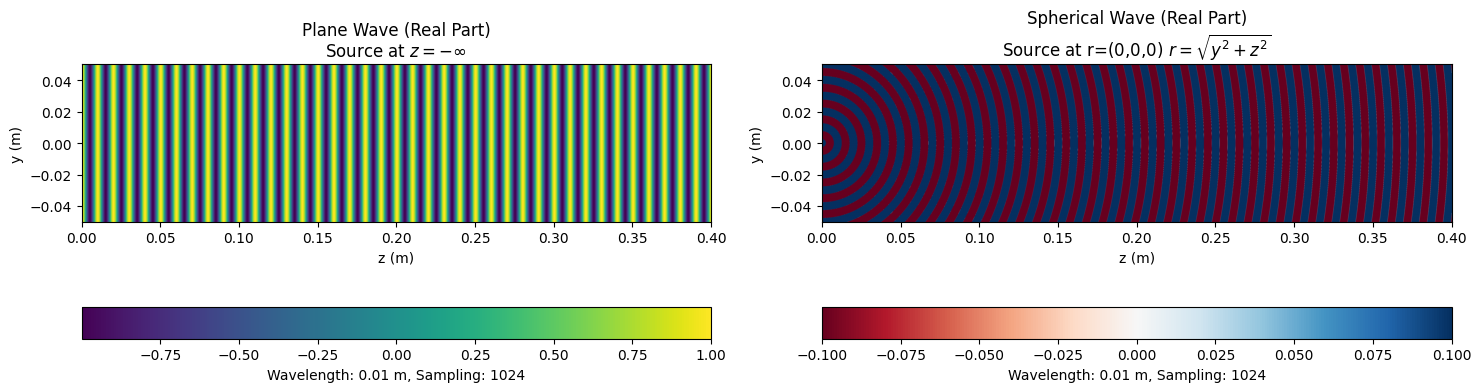

In [376]:
# 샘플링 포인트 수 (해상도)
# 샘플링 수 많아지면 연산속도 길어짐
N = 1024

# wavelength = 632.8e-9  # He-Ne 레이저 파장 (632.8 nm)
wavelength = 0.01  # 1cm
screen_size = 0.1  # 10cm

light_source_position = [0,0,0]

mask_dist = 0.4

plane_wave_yz, plane_wave_L1, yp, zp, Yp, Zp = create_plane_wave_yz(N, screen_size, wavelength, L1 = mask_dist, dtype=np.complex64)
spherical_wave_yz, spherical_wave_L1, ys, zs, Ys, Zs = create_spherical_wave_yz(N, position=light_source_position, screen_size=screen_size, wavelength=wavelength ,L1=mask_dist,x_position=0,dtype=np.complex64)

print(plane_wave_yz.shape)
print(spherical_wave_yz.shape)

x_index = N // 2  # x=0에 해당하는 인덱스


# 시각화
plt.figure(figsize=(15, 6))

# 평면파 (+z축 방향 진행)
plt.subplot(1, 2, 1)
img_1 = plt.imshow(plane_wave_yz.real,
           extent=[0, mask_dist, -screen_size/2, screen_size/2],
           cmap='viridis', aspect='auto', origin='lower')
plt.title('Plane Wave (Real Part)\n'+r'Source at ${z=-\infty}$')
plt.xlabel('z (m)')
plt.ylabel('y (m)')
plt.colorbar(img_1, label=f'Wavelength: {wavelength} m, Sampling: {N}', orientation='horizontal')
plt.gca().set_aspect('equal', adjustable='box')

# 구면파 (at (0,0,0))
plt.subplot(1, 2, 2)
img_2 = plt.imshow(spherical_wave_yz.real,
           extent=[0, mask_dist, -screen_size/2, screen_size/2],
           cmap='RdBu', aspect='auto', vmin=-0.1, vmax=0.1, origin='lower')
plt.title('Spherical Wave (Real Part)\n'+r'Source at r=(0,0,0) $r=\sqrt{y^2 + z^2}$')
plt.xlabel('z (m)')
plt.ylabel('y (m)')
plt.colorbar(img_2, label=f'Wavelength: {wavelength} m, Sampling: {N}', orientation='horizontal')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()




### 슬릿 / 원형 개구 마스크 구현

기본 크기가 얼마일때, 광원의 빛이 통과할 영역을 True, 통과하지 못하는 영역을 False로 하는 마스크 함수 정의

슬릿은 y축과 평행하며 슬릿 간격 및 x축 상 위치 조절 가능
원형 개구는 중앙 위치와 반지름 조절 가능

In [377]:
def create_slit_mask(slit_width, slit_center_x = 0,dtype=np.complex64):
    '''슬릿 마스크 생성'''
    
    y = np.linspace(-screen_size/2, screen_size/2, N)
    x = np.linspace(-screen_size/2, screen_size/2, N)
    X, Y = np.meshgrid(x, y)

    slit_mask = np.zeros_like(X, dtype=dtype)
    slit_mask[(np.abs(X - slit_center_x) <= slit_width/2)] = True

    return slit_mask

def create_circular_mask(radius,center_x = 0, center_y = 0,dtype=np.complex64):
    '''원형개구 마스크 생성'''
    
    y = np.linspace(-screen_size/2, screen_size/2, N)
    x = np.linspace(-screen_size/2, screen_size/2, N)
    X, Y = np.meshgrid(x, y)
    
    circular_mask = np.zeros_like(X, dtype=dtype)
    r = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    circular_mask[r <= radius] = True
    
    return circular_mask

def create_square_mask(side_length, center_x=0, center_y=0, dtype=np.complex64):
    '''정사각형 개구 마스크 생성'''
    y = np.linspace(-screen_size/2, screen_size/2, N)
    x = np.linspace(-screen_size/2, screen_size/2, N)
    X, Y = np.meshgrid(x, y)
    
    square_mask = np.zeros_like(X, dtype=dtype)
    
    # 정사각형 조건: 중심으로부터 x, y 방향 모두 side_length/2 이하
    condition = (np.abs(X - center_x) <= side_length/2) & (np.abs(Y - center_y) <= side_length/2)
    square_mask[condition] = True
    
    return square_mask


슬릿 / 원형개구 마스크를 시각화

(1024, 1024)
(1024, 1024)
Square mask shape: (1024, 1024)


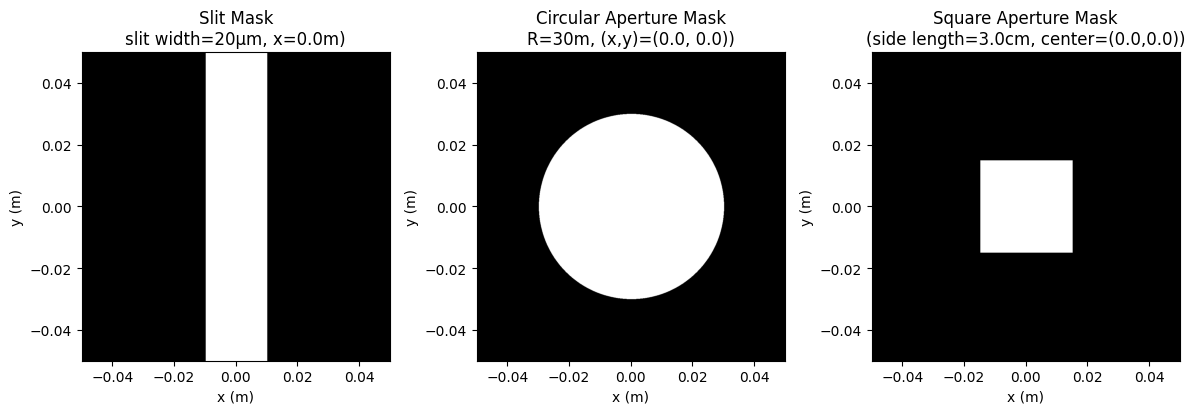

In [378]:

slit_width = 0.02  # um
slit_center_x = 0.0  # cm

radius = 0.03  # 3 cm
center_x, center_y = 0.0, 0.0  # 중심 위치

square_side = 0.03  # 2.5cm × 2.5cm 정사각형
square_center_x, square_center_y = 0.0, 0.0  # 정사각형 중심

slit_mask = create_slit_mask(slit_width, slit_center_x,dtype=np.complex128)
circular_mask = create_circular_mask(radius, center_x, center_y,dtype=np.complex128)
square_mask = create_square_mask(square_side, square_center_x, square_center_y, dtype=np.complex128)

print(slit_mask.shape)
print(circular_mask.shape)
print(f"Square mask shape: {square_mask.shape}")

def plot_mask(mask, title):
    """마스크 시각화 도우미 함수"""
    plt.imshow(mask.real.astype(float),  # 복소수 → 실수 변환
               cmap='gray', 
               vmin=0, vmax=1,  # 0(검은색) ~1(흰색) 고정
               extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2])
    plt.title(title)
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plot_mask(slit_mask, f'Slit Mask\nslit width={slit_width*1000:.0f}μm, x={slit_center_x}m)')

plt.subplot(1, 3, 2)
plot_mask(circular_mask, f'Circular Aperture Mask\nR={radius*1000:.0f}m, (x,y)={center_x,center_y})')

plt.subplot(1, 3, 3)
plot_mask(square_mask, f'Square Aperture Mask\n(side length={square_side*100:.1f}cm, center=({square_center_x},{square_center_y}))')

plt.tight_layout()
plt.show()

회절패턴 계산(FFT 기반)

프라운호퍼 회절은 다음과 같이 구할 수 있다는 내용

In [379]:
def fraunhofer_diffraction(U_L1, mask:np.ndarray, L2, calculate_yz_plane=False):
    """
    프라운호퍼 회절 계산 (광선 진행 시각화)
    
    Parameters:
        U_L1 (np.array): L1 위치 파면 [Nx, Ny] (복소수)
        mask (np.array): 2D 마스크 [Nx, Ny] (True=투과)
        L2 (float): 마스크→스크린 거리 [m]
        calculate_yz_plane (bool): y-z 평면 계산 여부 (True=계산, False=생략)
        screen_size (float): 스크린 물리적 크기 [m]
        wavelength (float): 파장 [m]
        
    Returns:
        yz_plane (np.array or None): y-z 평면 강도 분포 [Ny, Nz] (calculate_yz_plane=False시 None)
        U_masked (np.array): 마스크 적용된 파면
        screen_pattern (np.array): 스크린 강도 분포 [Nx, Ny]
        intensity_1d (np.array): x=0에서 y축 강도 분포 [Ny]
        y_coords (np.array): y 좌표
        z_coords (np.array or None): z 좌표 (calculate_yz_plane=False시 None)
    """
    # 마스크 적용
    U_masked = U_L1 * mask
    
    # FFT 계산
    Nx, Ny = U_L1.shape
    dx = screen_size / Nx
    dy = screen_size / Ny
    
    fx = np.fft.fftshift(np.fft.fftfreq(Nx, dx))
    x = fx * wavelength * L2
    fy = np.fft.fftshift(np.fft.fftfreq(Ny, dy))
    y = fy * wavelength * L2
        
    U_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(U_masked)))
    screen_pattern = np.abs(U_fft)**2
    
    # 1차원 강도 분포
    intensity_1d = screen_pattern[Nx//2, :]
    
    # y-z 평면 계산 (조건부 실행)
    if calculate_yz_plane:
        # 마스크 통과 직후 y방향 프로파일 (x=0)
        mask_profile = np.abs(U_masked[Nx//2, :])**2  # 마스크 형태
        
        # y-z 평면 생성 (광선 진행 모델링)
        Nz = int(Nx * (L2 / screen_size))
        z_coords = np.linspace(0, L2, Nz)
        y_mask = np.linspace(-screen_size/2, screen_size/2, Ny)  # 마스크에서의 y 좌표
        y_screen = y  # 스크린에서의 y 좌표
        
        yz_plane = np.zeros((Ny, Nz))
        
        # 각 z 위치에서의 광선 분포 계산
        for i, z in enumerate(z_coords):
            if z == 0:
                # z=0: 마스크 바로 뒤
                yz_plane[:, i] = mask_profile
            else:
                # z>0: 광선 진행에 따른 퍼짐
                # 프라운호퍼 조건에서 각도 계산
                angles = np.arctan((y_screen - 0) / L2)  # 중심에서의 회절각
                
                # 현재 z에서의 y 위치 계산 (기하광학적 접근)
                y_current = z * np.tan(angles)
                
                # 마스크에서 나온 광선들의 강도 분포
                intensity_at_z = np.zeros(Ny)
                
                for j, y_pos in enumerate(y_mask):
                    if mask_profile[j] > 0:  # 마스크를 통과한 광선만
                        # 해당 위치에서 나온 광선이 현재 z에서 도달하는 y 위치들
                        spread_factor = z / L2  # 퍼짐 정도
                        
                        # 가우시안 퍼짐으로 근사 (실제 회절 효과)
                        sigma = spread_factor * screen_size * 0.1  # 퍼짐 정도 조절
                        
                        for k, y_target in enumerate(y_mask):
                            distance = abs(y_target - y_pos)
                            if sigma > 0:
                                weight = np.exp(-(distance**2) / (2 * sigma**2))
                                intensity_at_z[k] += mask_profile[j] * weight
                
                # 정규화
                if np.max(intensity_at_z) > 0:
                    intensity_at_z /= np.max(intensity_at_z)
                    
                yz_plane[:, i] = intensity_at_z
        
        # 최종 스크린에서는 실제 프라운호퍼 패턴 사용
        yz_plane[:, -1] = screen_pattern[Nx//2, :] / np.max(screen_pattern[Nx//2, :])
        
    else:
        yz_plane = None
        z_coords = None
        y_mask = np.linspace(-screen_size/2, screen_size/2, Ny)  # 기본 y 좌표
    
    # 좌표계
    X, Y = np.meshgrid(x, y, indexing='ij')
    
    return yz_plane, U_masked, screen_pattern, intensity_1d, y_mask, z_coords


### 프라운호퍼 회절 구현

광원, 마스크 선택 -> $L_1,L_2$ 거리 조절
회절 형태와 스크린에 나타난 에어리디스크 구하기

광원 데이터를 생성한다.

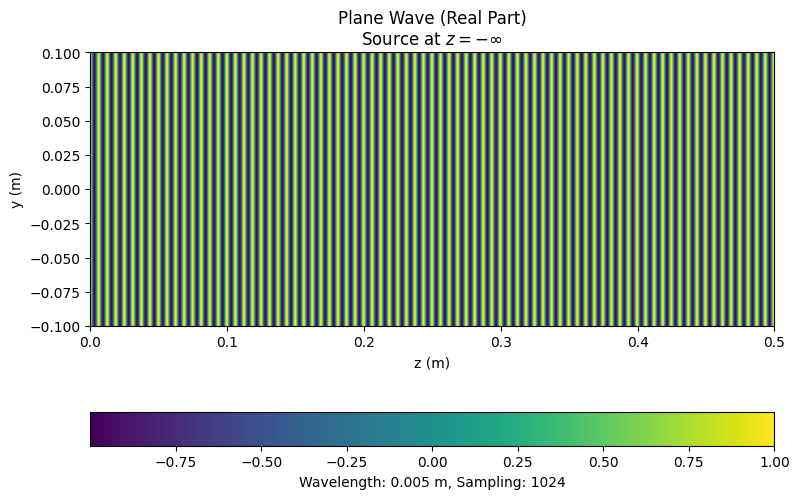

In [380]:
# 테스트 파라미터
N = 1024 # 샘플링 수
screen_size = 0.2 # 20cm
# wavelength = 632.8e-9  # He-Ne 레이저 파장 (632.8 nm)
wavelength = 0.005  # 1cm
L1, L2 = 0.5 , 2.5  # 50cm, 2.5m

# # 평면파 광원 생성
plane_wave_yz,plane_wave_L1, yp, zp, Yp, Zp = create_plane_wave_yz(N, screen_size, wavelength, L1 = mask_dist, dtype=np.complex128)

plt.figure(figsize=(15, 6))

# 평면파 (+z축 진행)
plt.subplot(1, 2, 1)
img_1 = plt.imshow(plane_wave_yz.real,
           extent=[0, L1, -screen_size/2, screen_size/2],
           cmap='viridis', aspect='auto', origin='lower')
plt.title('Plane Wave (Real Part)\n'+r'Source at ${z=-\infty}$')
plt.xlabel('z (m)')
plt.ylabel('y (m)')
plt.colorbar(img_1, label=f'Wavelength: {wavelength} m, Sampling: {N}', orientation='horizontal')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

### 유한/무한 슬릿에 의한 프라운 호퍼 회절무늬

슬릿 스펙을 입력하고, 슬릿 마스크를 생성한다.
프라운호퍼 회절 구현 함수에 평면파 광원과 슬릿 마스크를 입력하고, 마스크과 스크린과의 거리 $L_2$ 를 입력한다.

추가적으로 프라운호퍼 회절 함수에서 회절광이 전파되는 yz평면상의 스펙트럼 연산을 True로 설정한다.

#### 슬릿 마스크 테스트
생성한 평면파와 슬릿 마스크를 곱해 회절될 광원이 어떤 형태인지 확인한다.

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/971624.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1].imshow(slit_mask.astype(float),


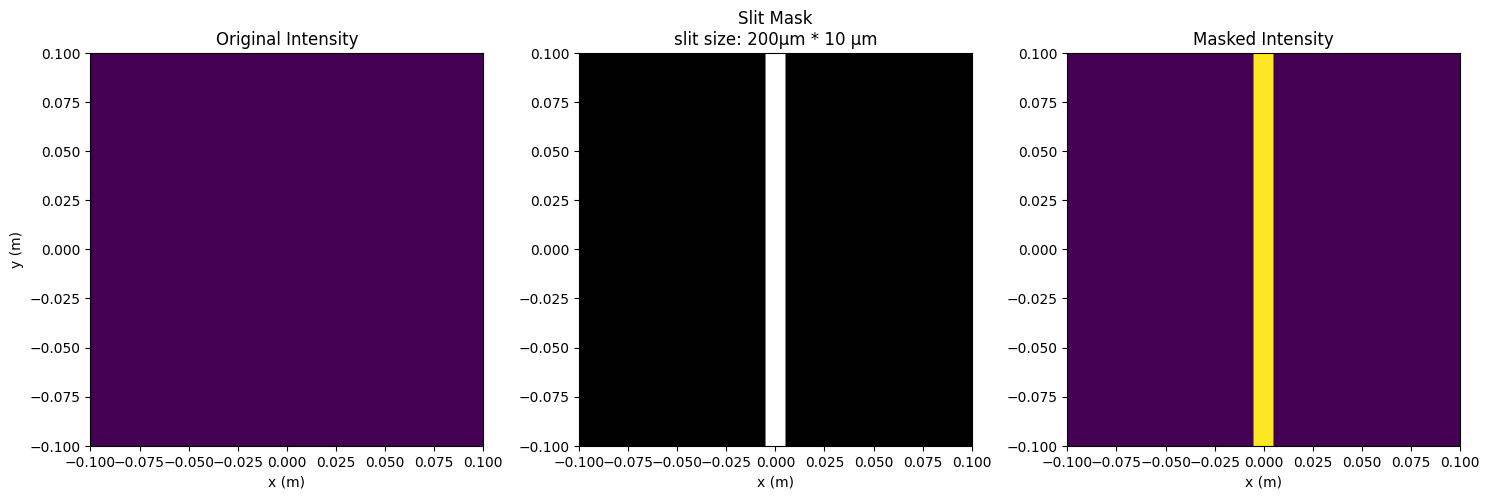

In [381]:
# 슬릿 스펙
slit_width = 0.01  # um
slit_center_x = 0.0  # cm

# 슬릿 마스크 생성
slit_mask = create_slit_mask(slit_width,slit_center_x,dtype=np.complex128)

# 프라운호퍼 회절 계산 (계산 오래 걸림)
plane_wave_diffraction_yz_slit, plane_wave_masked_slit , plane_wave_diffraction_pattern_slit, plane_wave_diffraction_intensity_slit ,y_mask_slit, z_coords_slit = fraunhofer_diffraction(plane_wave_L1,slit_mask,L2,calculate_yz_plane=True)

# 간단한 전후 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(-screen_size/2, screen_size/2, plane_wave_L1.shape[0])
y = np.linspace(-screen_size/2, screen_size/2, plane_wave_L1.shape[1])

# 원본 강도
axes[0].imshow(np.abs(plane_wave_L1)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='viridis', origin='lower')
axes[0].set_title('Original Intensity')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')

# 마스크
axes[1].imshow(slit_mask.astype(float),
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='gray', origin='lower')
axes[1].set_title('Slit Mask\n'+f'slit size: {screen_size*1000:.0f}μm * {slit_width*1000:.0f} μm')
axes[1].set_xlabel('x (m)')
# axes[1].set_ylabel('y (m)')

# 마스크 적용 후 강도
axes[2].imshow(np.abs(plane_wave_masked_slit)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='viridis', origin='lower')
axes[2].set_title('Masked Intensity')
axes[2].set_xlabel('x (m)')
# axes[2].set_ylabel('y (m)')

plt.tight_layout()
plt.show()

#### 시각화 : 마스크(슬릿/개구)를 지난 후 퍼져나가는 회절광

yz평면상의 회절광을 스펙트럼으로 시각화

(1024, 12800)


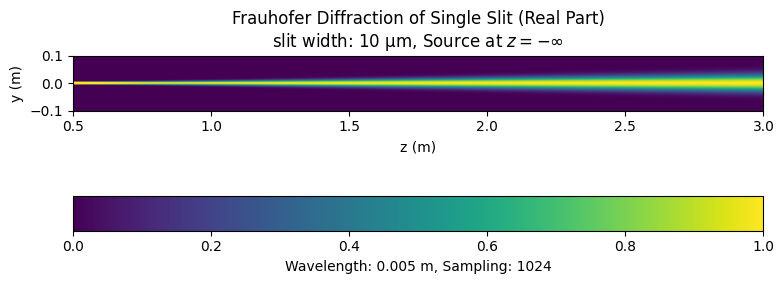

In [382]:
print(plane_wave_diffraction_yz_slit.shape)

# 시각화
plt.figure(figsize=(15, 6))

# 평면파 (+z축 진행)
plt.subplot(1, 2, 1)
img_1 = plt.imshow(plane_wave_diffraction_yz_slit.real,
           extent=[L1, L1+L2, -screen_size/2, screen_size/2],
           cmap='viridis', aspect='auto', origin='lower')
plt.title('Frauhofer Diffraction of Single Slit (Real Part)\n'+f'slit width: {slit_width*1000:.0f} μm, '+r'Source at ${z=-\infty}$')
plt.xlabel('z (m)')
plt.ylabel('y (m)')
plt.colorbar(img_1, label=f'Wavelength: {wavelength} m, Sampling: {N}', orientation='horizontal')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

#### 길이가 유한한 슬릿에 의한 프라운호퍼 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/271956631.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


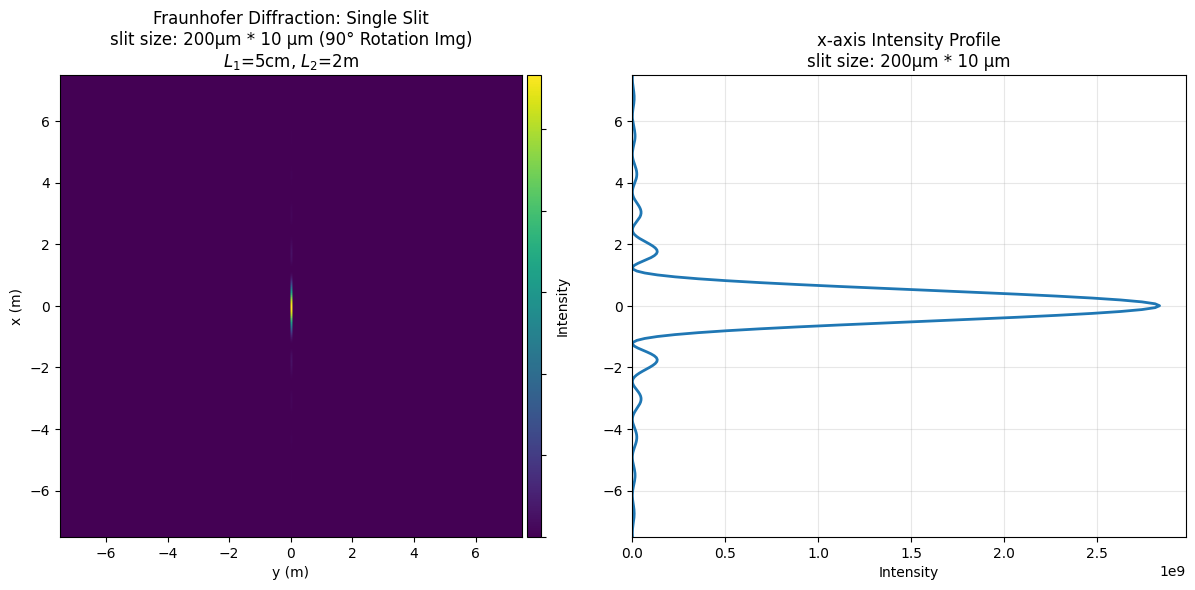

In [383]:
# 데이터 준비 ----------------------------------------------------------
rotated_pattern = np.rot90(plane_wave_diffraction_pattern_slit)  # 90도 회전

# x축 좌표 재계산 (FFT 기반)
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 실제 물리적 좌표

a = 7.5
# y=0 인덱스 찾기
y = np.linspace(-screen_size/2, screen_size/2, N)
y_index = np.abs(y - 0).argmin()

intensity = plane_wave_diffraction_intensity_slit.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace 줄임

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='viridis',
               aspect='equal',
               origin='lower')
ax1.set_xlim(-a, a)
ax1.set_ylim(-a, a)
ax1.set_title(f'Fraunhofer Diffraction: Single Slit\n' + f'slit size: {screen_size*1000:.0f}μm * {slit_width*1000:.0f} μm (90° Rotation Img)\n'+r'$L_1$='+f'{L1*10:.0f}cm, '+r'$L_2$='+f'{L2:.0f}m', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바를 이미지 바로 옆에 붙이기 (더 가깝게)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)  # size와 pad 줄임
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])  # 숫자 레이블 제거

# 1차원 강도 그래프 (90도 회전) - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)  # x축: intensity, y축: x 좌표
ax2.set_xlim(left=0)
ax2.set_ylim(-a, a)  # 실제 x 범위로 설정
ax2.set_title(f'x-axis Intensity Profile\nslit size: {screen_size*1000:.0f}μm * {slit_width*1000:.0f} μm', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### 무한하게 긴 슬릿에 의한 프라운호퍼 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/2880531757.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


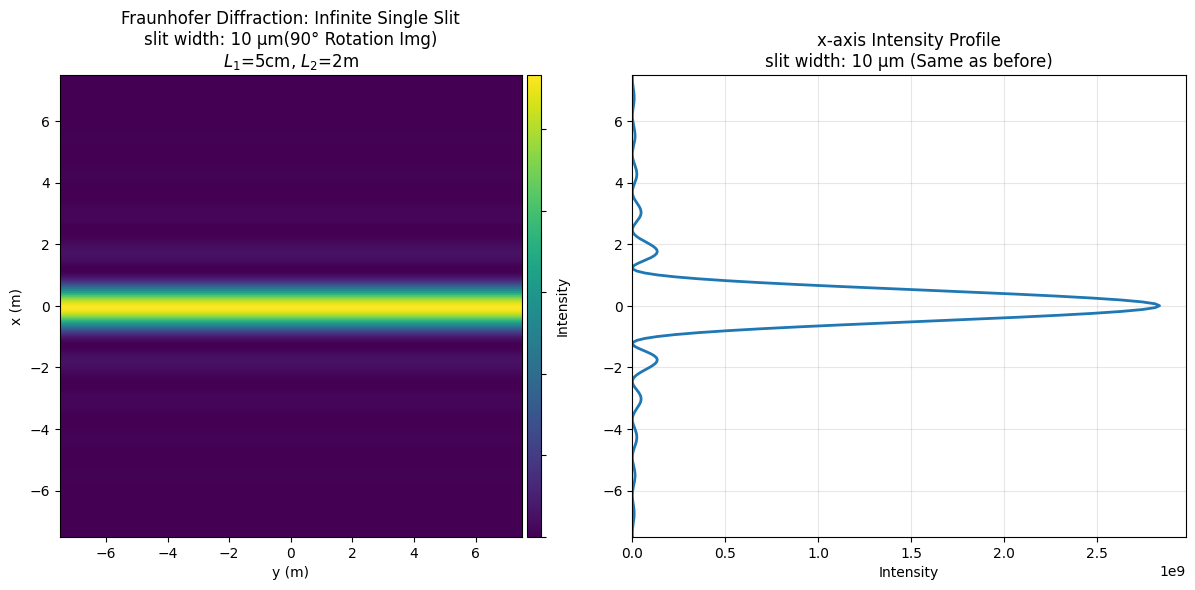

In [384]:
# 데이터 준비 ----------------------------------------------------------
# 원본 회절 패턴에서 중앙 회절 강도 추출
central_slice = plane_wave_diffraction_pattern_slit[N//2, :]  # x=0에서의 y방향 프로파일

# 검색 결과 5에서 확인된 np.tile() 사용하여 y축으로 확장
infinite_slit_pattern = np.tile(central_slice, (N, 1))  # (N, 1) 형태로 N번 반복

# 90도 회전
rotated_infinite_pattern = np.rot90(infinite_slit_pattern)

# 좌표 계산
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 회절 좌표

y = np.linspace(-screen_size/2, screen_size/2, N)  # 물리적 좌표

a = 7.5
intensity = plane_wave_diffraction_intensity_slit.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_infinite_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='viridis',
               aspect='equal',
               origin='lower')
ax1.set_xlim(-a, a)
ax1.set_ylim(-a, a)
ax1.set_title(f'Fraunhofer Diffraction: Infinite Single Slit\n'+f'slit width: {slit_width*1000:.0f} μm(90° Rotation Img)\n'+r'$L_1$='+f'{L1*10:.0f}cm, '+r'$L_2$='+f'{L2:.0f}m', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])

# 1차원 강도 그래프 - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)
ax2.set_xlim(left=0)
ax2.set_ylim(-a, a)
ax2.set_title(f'x-axis Intensity Profile\nslit width: {slit_width*1000:.0f} μm (Same as before)', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 원형 개구에 의한 프라운호퍼 회절

원형 개구의 스펙을 입력하고, 원형 개구 마스크를 생성한다.
프라운호퍼 회절 구현 함수에 평면파 광원과 원형개구 마스크를 입력하고, 마스크와 스크린과의 거리 $L_2$ 를 입력한다.

#### 원형 개구 마스크 테스트
생성한 평면파와 원형 개구 마스크를 곱해 회절될 광원이 어떤 형태인지 확인한다.

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/3755281817.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1].imshow(circular_mask.astype(float),


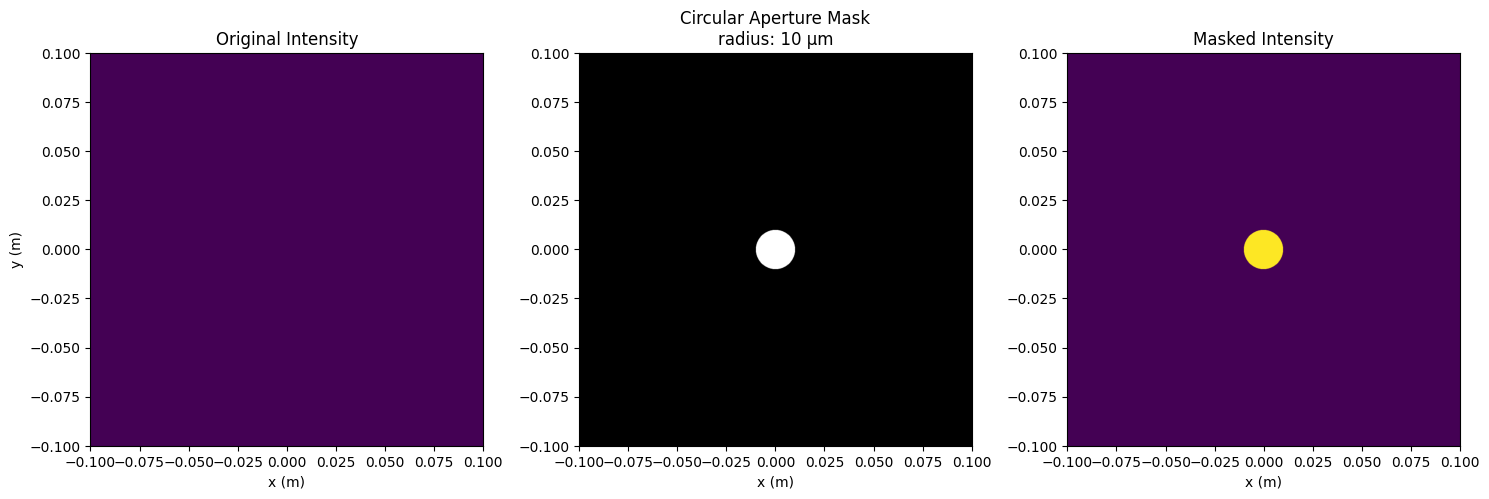

In [385]:
# 원형 개구 스펙
radius = 0.01 #um
center_x, center_y = 0.0, 0.0  # 중심 위치

# 원형 개구 마스크 생성
circular_mask = create_circular_mask(radius,center_x,center_y,dtype=np.complex128)

# 프라운호퍼 회절 계산
plane_wave_diffraction_yz_aperture, plane_wave_masked_aperture, plane_wave_diffraction_pattern_aperture, plane_wave_diffraction_intensity_aperture ,y_mask_aperture, z_coords_aperture = fraunhofer_diffraction(plane_wave_L1,circular_mask,L2)

# 간단한 전후 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(-screen_size/2, screen_size/2, plane_wave_L1.shape[0])
y = np.linspace(-screen_size/2, screen_size/2, plane_wave_L1.shape[1])

# 원본 강도
axes[0].imshow(np.abs(plane_wave_L1)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='viridis', origin='lower')
axes[0].set_title('Original Intensity')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')

# 마스크
axes[1].imshow(circular_mask.astype(float),
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='gray', origin='lower')
axes[1].set_title('Circular Aperture Mask\n'+f'radius: {radius*1000:.0f} μm')
axes[1].set_xlabel('x (m)')
# axes[1].set_ylabel('y (m)')

# 마스크 적용 후 강도
axes[2].imshow(np.abs(plane_wave_masked_aperture)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='viridis', origin='lower')
axes[2].set_title('Masked Intensity')
axes[2].set_xlabel('x (m)')
# axes[2].set_ylabel('y (m)')

plt.tight_layout()
plt.show()


#### 원형 개구에 의한 프라운호퍼 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/2374137577.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


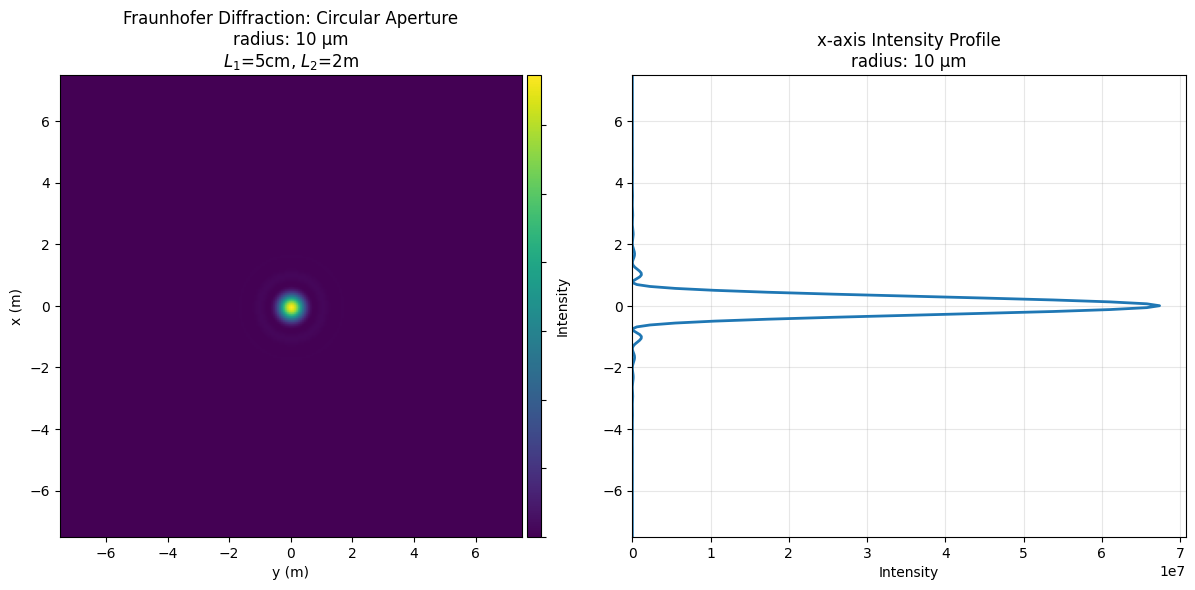

In [386]:
# 데이터 준비 ----------------------------------------------------------
rotated_pattern = np.rot90(plane_wave_diffraction_pattern_aperture)  # 90도 회전

# x축 좌표 재계산 (FFT 기반)
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 실제 물리적 좌표

a = 7.5
# y=0 인덱스 찾기
y = np.linspace(-screen_size/2, screen_size/2, N)
y_index = np.abs(y - 0).argmin()
intensity = plane_wave_diffraction_intensity_aperture.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace 줄임

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='viridis',
               aspect='equal',
               origin='lower')
ax1.set_xlim(-a, a)
ax1.set_ylim(-a, a)
ax1.set_title(f'Fraunhofer Diffraction: Circular Aperture\n'+ f'radius: {radius*1000:.0f} μm\n'+r'$L_1$='+f'{L1*10:.0f}cm, '+r'$L_2$='+f'{L2:.0f}m', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바를 이미지 바로 옆에 붙이기
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)  # size와 pad 줄임
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])  # 숫자 레이블 제거

# 1차원 강도 그래프 (90도 회전) - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)  # x축: intensity, y축: x 좌표
ax2.set_xlim(left=0)
ax2.set_ylim(-a, a)  # 실제 x 범위로 설정
ax2.set_title(f'x-axis Intensity Profile\nradius: {radius*1000:.0f} μm', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 정사각형 개구에 의한 프라운호퍼 회절

정사각형 개구 스펙을 입력하고, 정사각형 개구 마스크를 생성한다.
프라운호퍼 회절 구현 함수에 평면파 광원과 정사각형 개구 마스크를 입력하고, 마스크와 스크린과의 거리 $L_2$ 를 입력한다.

#### 정사각형 개구 마스크 테스트
생성한 평면파와 정사각형 개구 마스크를 곱해 회절될 광원이 어떤 형태인지 확인한다.

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/2183354132.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1].imshow(square_mask.astype(float),


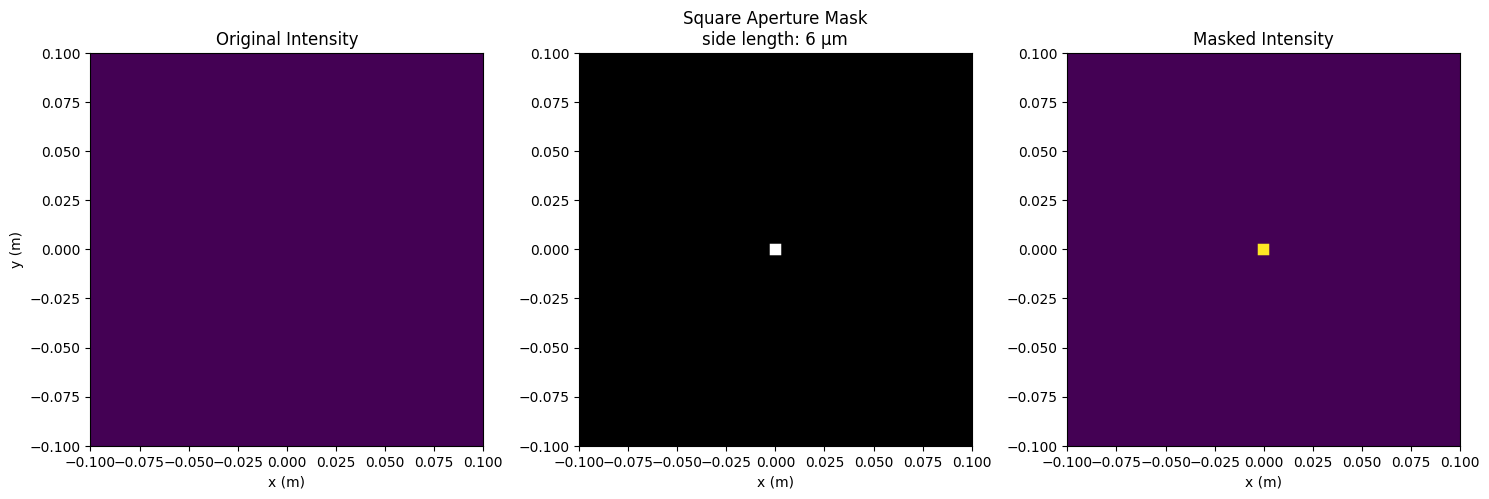

In [387]:
# 정사각형 개구 스펙
square_side = 0.006 # um
square_center_x, square_center_y = 0.0, 0.0  # 정사각형 중심

# 정사각형 개구 마스크 생성
square_mask = create_square_mask(square_side, square_center_x, square_center_y, dtype=np.complex128)

# 프라운호퍼 회절 계산
plane_wave_diffraction_yz_square, plane_wave_masked_square , plane_wave_diffraction_pattern_square, plane_wave_diffraction_intensity_square ,y_mask_square, z_coords_square = fraunhofer_diffraction(plane_wave_L1,square_mask,L2)

# 간단한 전후 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(-screen_size/2, screen_size/2, plane_wave_L1.shape[0])
y = np.linspace(-screen_size/2, screen_size/2, plane_wave_L1.shape[1])

# 원본 강도
axes[0].imshow(np.abs(plane_wave_L1)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='viridis', origin='lower')
axes[0].set_title('Original Intensity')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')

# 마스크
axes[1].imshow(square_mask.astype(float),
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='gray', origin='lower')
axes[1].set_title('Square Aperture Mask\n'+f'side length: {square_side*1000:.0f} μm')
axes[1].set_xlabel('x (m)')
# axes[1].set_ylabel('y (m)')

# 마스크 적용 후 강도
axes[2].imshow(np.abs(plane_wave_masked_square)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='viridis', origin='lower')
axes[2].set_title('Masked Intensity')
axes[2].set_xlabel('x (m)')
# axes[2].set_ylabel('y (m)')

plt.tight_layout()
plt.show()


#### 정사각형 개구에 의한 프라운호퍼 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/90358729.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


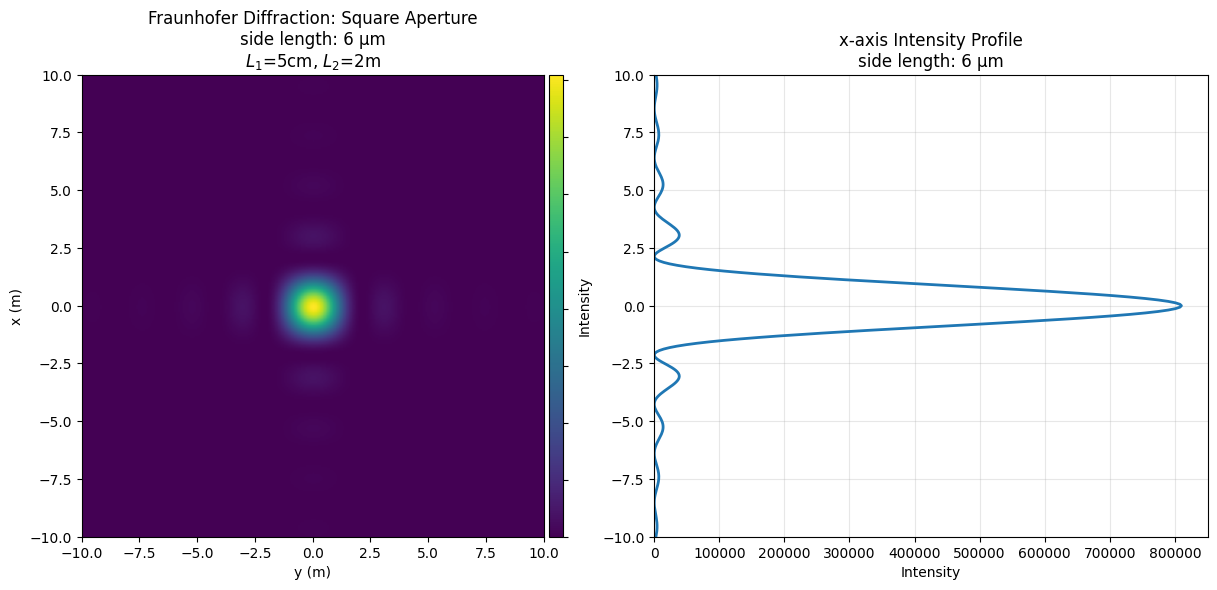

In [388]:
# 데이터 준비 ----------------------------------------------------------
rotated_pattern = np.rot90(plane_wave_diffraction_pattern_square)  # 90도 회전

# x축 좌표 재계산 (FFT 기반)
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 실제 물리적 좌표

a = 10
# y=0 인덱스 찾기
y = np.linspace(-screen_size/2, screen_size/2, N)
y_index = np.abs(y - 0).argmin()
intensity = plane_wave_diffraction_intensity_square.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace 줄임

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='viridis',
               aspect='equal',
               origin='lower')
ax1.set_xlim(-a, a)
ax1.set_ylim(-a, a)
ax1.set_title(f'Fraunhofer Diffraction: Square Aperture\n'+f'side length: {square_side*1000:.0f} μm\n'+r'$L_1$='+f'{L1*10:.0f}cm, '+r'$L_2$='+f'{L2:.0f}m', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바를 이미지 바로 옆에 붙이기 (더 가깝게)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)  # size와 pad 줄임
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])  # 숫자 레이블 제거

# 1차원 강도 그래프 (90도 회전) - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)  # x축: intensity, y축: x 좌표
ax2.set_xlim(left=0)
ax2.set_ylim(-a, a)  # 실제 x 범위로 설정
# ax2.set_title('x-axis Intensity Profile\ny=0', fontsize=12)
ax2.set_title(f'x-axis Intensity Profile\nside length: {square_side*1000:.0f} μm', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


프라운호퍼 회절 시각화 : 유한한 슬릿 마스크

프라운호퍼 회절 : 무한 슬릿 마스크

In [389]:
def fresnel_diffraction(U_L1, mask: np.ndarray, L2):
    """
    프레넬 회절 계산 (광선 진행 시각화)
    
    Parameters:
        U_L1 (np.array): L1 위치 파면 [Nx, Ny] (복소수)
        mask (np.array): 2D 마스크 [Nx, Ny] (True=투과)
        L2 (float): 마스크→스크린 거리 [m]
        calculate_yz_plane (bool): y-z 평면 계산 여부 (현재 미구현)
        screen_size (float): 스크린 물리적 크기 [m]
        wavelength (float): 파장 [m]
        
    Returns:
        yz_plane (None): 현재 미구현
        U_masked (np.array): 마스크 적용된 파면
        screen_pattern (np.array): 스크린 강도 분포 [Nx, Ny]
        intensity_1d (np.array): x=0에서 y축 강도 분포 [Ny]
        y_coords (np.array): y 좌표
        z_coords (None): 현재 미구현
    """
    k = 2 * np.pi / wavelength
    Nx, Ny = U_L1.shape
    dx = screen_size / Nx
    dy = screen_size / Ny

    # 입력 평면 좌표 생성
    x_input = np.linspace(-screen_size/2, screen_size/2, Nx)
    y_input = np.linspace(-screen_size/2, screen_size/2, Ny)
    X_input, Y_input = np.meshgrid(x_input, y_input, indexing='ij')

    # 마스크 적용 및 프레넬 위상 항 곱하기
    U_masked = U_L1 * mask
    quadratic_phase = np.exp(1j * k/(2 * L2) * (X_input**2 + Y_input**2))
    U_phase = U_masked * quadratic_phase

    # FFT 계산
    U_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(U_phase)))

    # 출력 좌표 계산 (프라운호퍼와 동일 체계)
    fx = np.fft.fftshift(np.fft.fftfreq(Nx, dx))
    fy = np.fft.fftshift(np.fft.fftfreq(Ny, dy))
    x = fx * wavelength * L2
    y = fy * wavelength * L2

    # 강도 계산 (물리적 스케일링 포함)
    scaling = 1 / (wavelength * L2)  # 프레넬 적분 스케일링 계수
    screen_pattern = (np.abs(U_fft) * scaling)**2

    # 1차원 강도 프로파일
    intensity_1d = screen_pattern[Nx//2, :]

    # y-z 평면 계산 (현재 미지원)
    yz_plane = None
    z_coords = None
    y_coords = np.linspace(-screen_size/2, screen_size/2, Ny)

    return yz_plane, U_masked, screen_pattern, intensity_1d, y_coords, z_coords


# + 프레넬 회절 시뮬레이션

기본 파라미터와 구면파 광원을 생성한다.

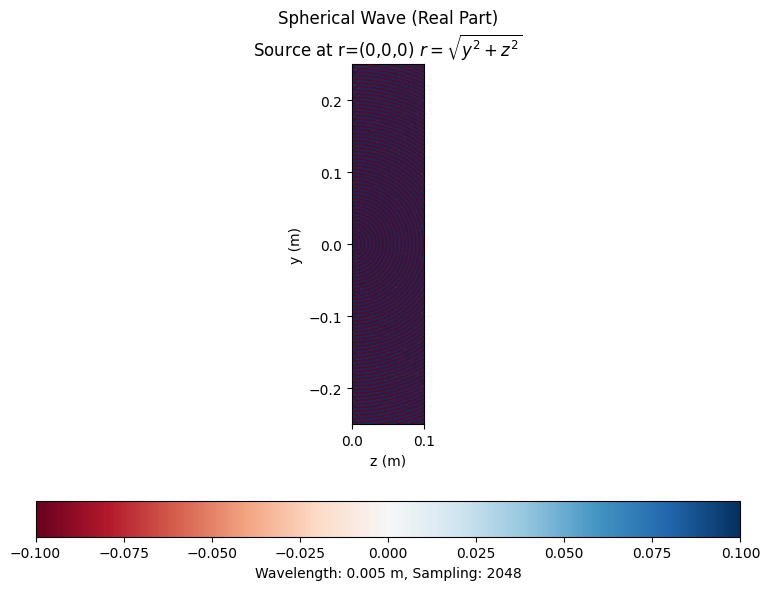

In [390]:
# 테스트 파라미터
N = 2048
screen_size = 0.5 # 50cm
# wavelength = 632.8e-9  # He-Ne 레이저 파장 (632.8 nm)
wavelength = 0.005  # 5mm
L1, L2 = 0.1 , 0.001  # 10cm, 0.1cm

light_source_position = [0,0,0]

spherical_wave_yz, spherical_wave_L1, ys, zs, Ys, Zs = create_spherical_wave_yz(N, position=light_source_position, screen_size=screen_size, wavelength=wavelength ,L1=L1,x_position=0,dtype=np.complex128)


# 시각화
plt.figure(figsize=(15, 6))
# 구면파 함수 (at (0,0,0))
plt.subplot(1, 2, 1)
img_2 = plt.imshow(spherical_wave_yz.real,
           extent=[0, L1, -screen_size/2, screen_size/2],
           cmap='RdBu', aspect='auto', vmin=-0.1, vmax=0.1, origin='lower')
plt.title('Spherical Wave (Real Part)\n'+r'Source at r=(0,0,0) $r=\sqrt{y^2 + z^2}$')
plt.xlabel('z (m)')
plt.ylabel('y (m)')
plt.colorbar(img_2, label=f'Wavelength: {wavelength} m, Sampling: {N}', orientation='horizontal')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

### 유한/무한 슬릿에 의한 프레넬 회절 패턴

슬릿 스펙을 입력하고, 슬릿 마스크를 생성한다.
프레넬 회절 구현 함수에 구면파 광원과 슬릿 마스크를 입력하고, 마스크과 스크린과의 거리 $L_2$ 를 입력한다.

#### 슬릿 마스크 테스트
생성한 구면파와 슬릿 마스크를 곱해 회절될 광원이 어떤 형태인지 확인한다.

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/1851210655.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1].imshow(slit_mask.astype(float),


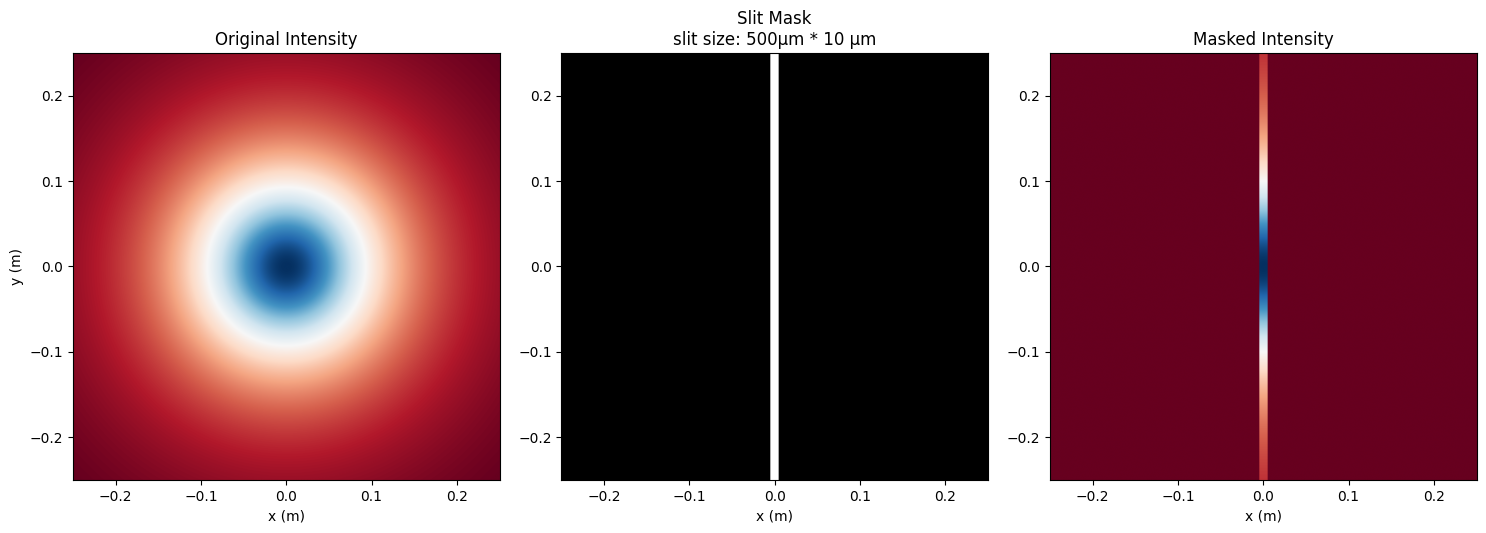

In [391]:
# 슬릿 스펙
slit_width = 0.01  # mm
slit_center_x = 0.0  # cm

# 슬릿 마스크 생성
slit_mask = create_slit_mask(slit_width,slit_center_x,dtype=np.complex128)

# 프라운호퍼 회절 계산
spherical_wave_diffraction_yz_slit, spherical_wave_masked_slit , spherical_wave_diffraction_pattern_slit, spherical_wave_diffraction_intensity_slit ,y_mask_slit, z_coords_slit = fresnel_diffraction(spherical_wave_L1,slit_mask,L2)

# 간단한 전후 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(-screen_size/2, screen_size/2, spherical_wave_L1.shape[0])
y = np.linspace(-screen_size/2, screen_size/2, spherical_wave_L1.shape[1])

# 원본 강도
axes[0].imshow(np.abs(spherical_wave_L1)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='RdBu', origin='lower')
axes[0].set_title('Original Intensity')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')

# 마스크
axes[1].imshow(slit_mask.astype(float),
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='gray', origin='lower')
axes[1].set_title('Slit Mask\n'+f'slit size: {screen_size*1000:.0f}μm * {slit_width*1000:.0f} μm')
axes[1].set_xlabel('x (m)')
# axes[1].set_ylabel('y (m)')

# 마스크 적용 후 강도
axes[2].imshow(np.abs(spherical_wave_masked_slit)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='RdBu', origin='lower')
axes[2].set_title('Masked Intensity')
axes[2].set_xlabel('x (m)')
# axes[2].set_ylabel('y (m)')

plt.tight_layout()
plt.show()

#### 길이가 유한한 슬릿에 의한 프레넬 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/1810366812.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


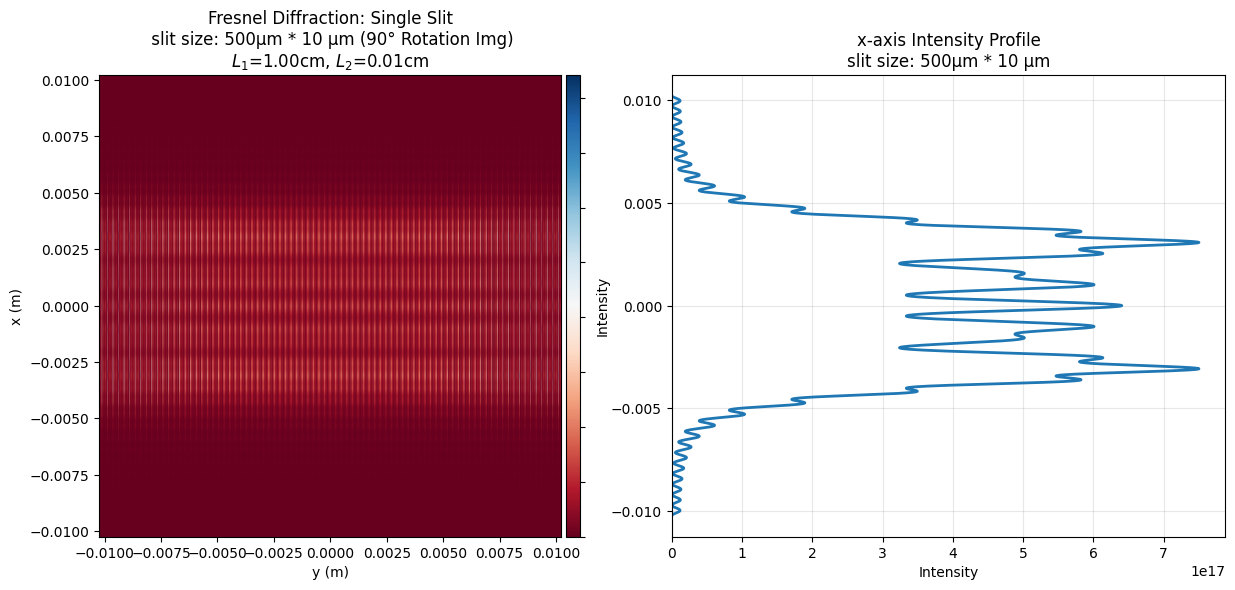

In [392]:
# 데이터 준비 ----------------------------------------------------------
rotated_pattern = np.rot90(spherical_wave_diffraction_pattern_slit)  # 90도 회전

# x축 좌표 재계산 (FFT 기반)
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 실제 물리적 좌표

# y=0 인덱스 찾기
y = np.linspace(-screen_size/2, screen_size/2, N)
y_index = np.abs(y - 0).argmin()

intensity = spherical_wave_diffraction_intensity_slit.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace 줄임

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='RdBu',
               aspect='equal',
               origin='lower')
ax1.set_title(f'Fresnel Diffraction: Single Slit\n'+f' slit size: {screen_size*1000:.0f}μm * {slit_width*1000:.0f} μm (90° Rotation Img)\n'+r'$L_1$='+f'{L1*10:.2f}cm, '+r'$L_2$='+f'{L2*10:.2f}cm', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바를 이미지 바로 옆에 붙이기 (더 가깝게)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)  # size와 pad 줄임
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])  # 숫자 레이블 제거

# 1차원 강도 그래프 (90도 회전) - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)  # x축: intensity, y축: x 좌표
ax2.set_xlim(left=0)

ax2.set_title(f'x-axis Intensity Profile\nslit size: {screen_size*1000:.0f}μm * {slit_width*1000:.0f} μm', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### 무한하게 긴 슬릿에 의한 프레넬 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/827901850.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


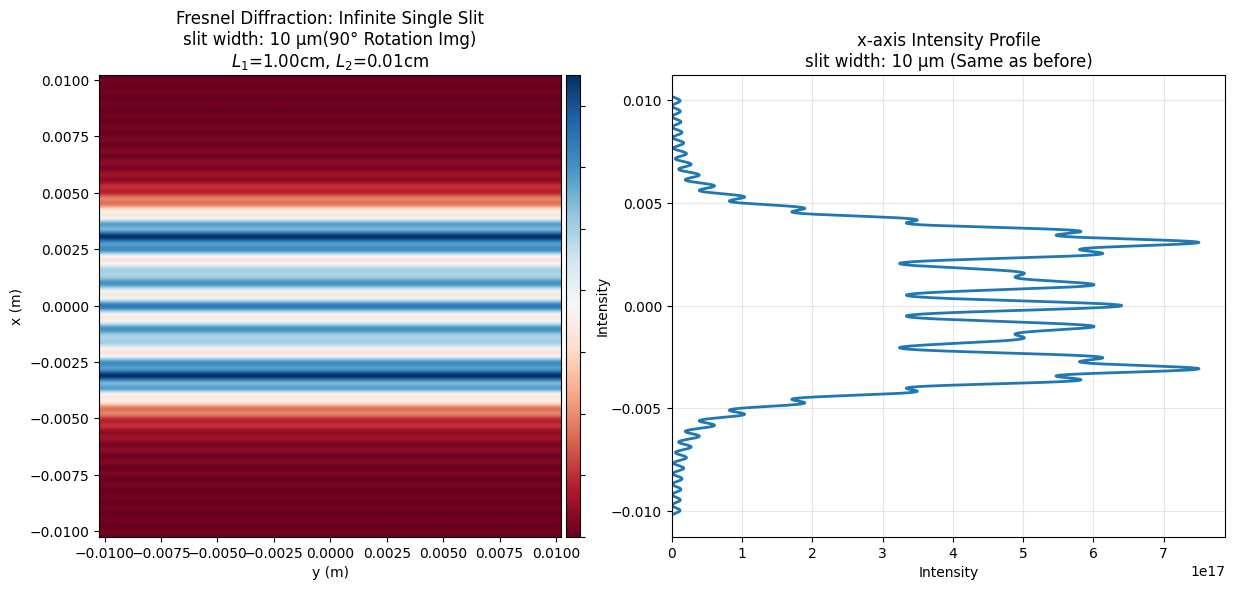

In [393]:
# 데이터 준비 ----------------------------------------------------------
# 원본 회절 패턴에서 중앙 회절 강도 추출
central_slice = spherical_wave_diffraction_pattern_slit[N//2, :]  # x=0에서의 y방향 프로파일

# 검색 결과 5에서 확인된 np.tile() 사용하여 y축으로 확장
infinite_slit_pattern = np.tile(central_slice, (N, 1))  # (N, 1) 형태로 N번 반복

# 90도 회전
rotated_infinite_pattern = np.rot90(infinite_slit_pattern)

# 좌표 계산
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 회절 좌표

y = np.linspace(-screen_size/2, screen_size/2, N)  # 물리적 좌표

intensity = spherical_wave_diffraction_intensity_slit.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_infinite_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='RdBu',
               aspect='equal',
               origin='lower')
ax1.set_title(f'Fresnel Diffraction: Infinite Single Slit\n'+f'slit width: {slit_width*1000:.0f} μm(90° Rotation Img)\n'+r'$L_1$='+f'{L1*10:.2f}cm, '+r'$L_2$='+f'{L2*10:.2f}cm', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])

# 1차원 강도 그래프 - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)
ax2.set_xlim(left=0)
ax2.set_title(f'x-axis Intensity Profile\nslit width: {slit_width*1000:.0f} μm (Same as before)', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 원형 개구에 의한 프레넬 회절 패턴

원형 개구 스펙을 입력하고, 원형 개구 마스크를 생성한다.
프레넬 회절 구현 함수에 구면파 광원과 원형 개구 마스크를 입력하고, 마스크과 스크린과의 거리 $L_2$ 를 입력한다.

#### 원형 개구 마스크 테스트
생성한 구면파와 원형 개구 마스크를 곱해 회절될 광원이 어떤 형태인지 확인한다.

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/4147515797.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1].imshow(circular_mask.astype(float),


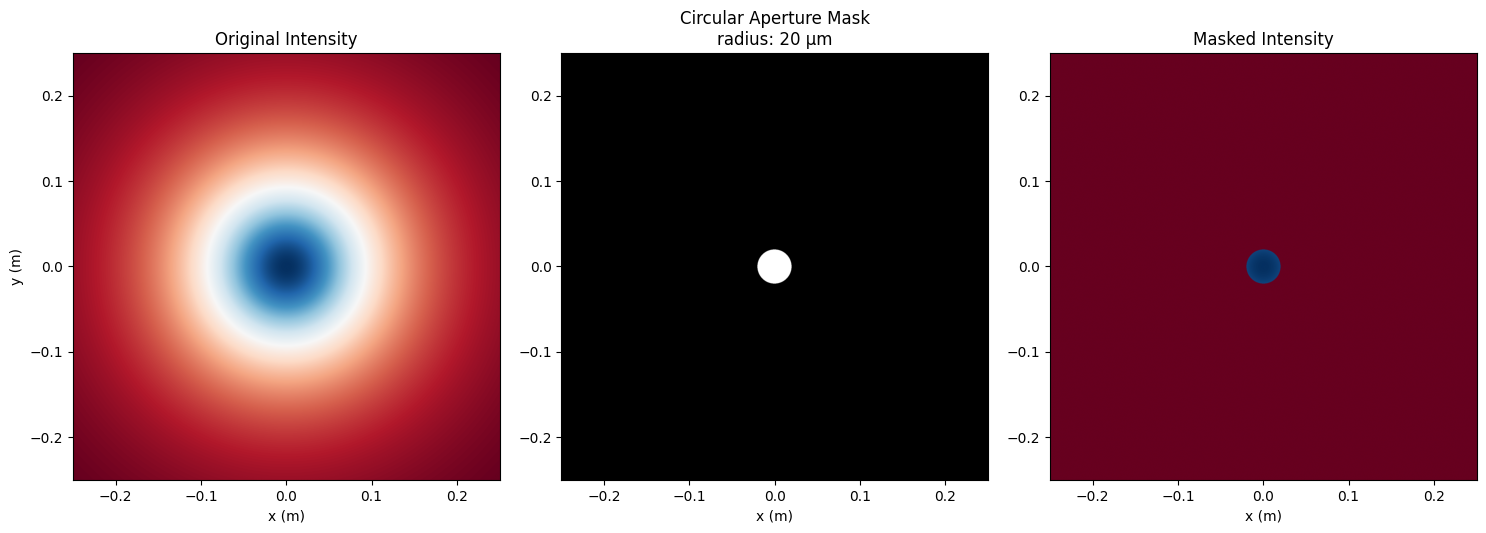

In [394]:
# 원형 개구 스펙
radius = 0.02 # mm
center_x, center_y = 0.0, 0.0  # 중심 위치

# 원형 개구 마스크 생성
circular_mask = create_circular_mask(radius,center_x,center_y,dtype=np.complex128)

# 프라운호퍼 회절 계산
spherical_wave_diffraction_yz_aperture, spherical_wave_masked_aperture, spherical_wave_diffraction_pattern_aperture, spherical_wave_diffraction_intensity_aperture ,y_mask_aperture, z_coords_aperture = fresnel_diffraction(spherical_wave_L1,circular_mask,L2)

# 간단한 전후 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(-screen_size/2, screen_size/2, spherical_wave_L1.shape[0])
y = np.linspace(-screen_size/2, screen_size/2, spherical_wave_L1.shape[1])

# 원본 강도
axes[0].imshow(np.abs(spherical_wave_L1)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='RdBu', origin='lower')
axes[0].set_title('Original Intensity')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')

# 마스크
axes[1].imshow(circular_mask.astype(float),
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='gray', origin='lower')
axes[1].set_title('Circular Aperture Mask\n'+f'radius: {radius*1000:.0f} μm')
axes[1].set_xlabel('x (m)')
# axes[1].set_ylabel('y (m)')

# 마스크 적용 후 강도
axes[2].imshow(np.abs(spherical_wave_masked_aperture)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='RdBu', origin='lower')
axes[2].set_title('Masked Intensity')
axes[2].set_xlabel('x (m)')
# axes[2].set_ylabel('y (m)')

plt.tight_layout()
plt.show()


#### 원형 개구에 의한 프레넬 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/3523317798.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


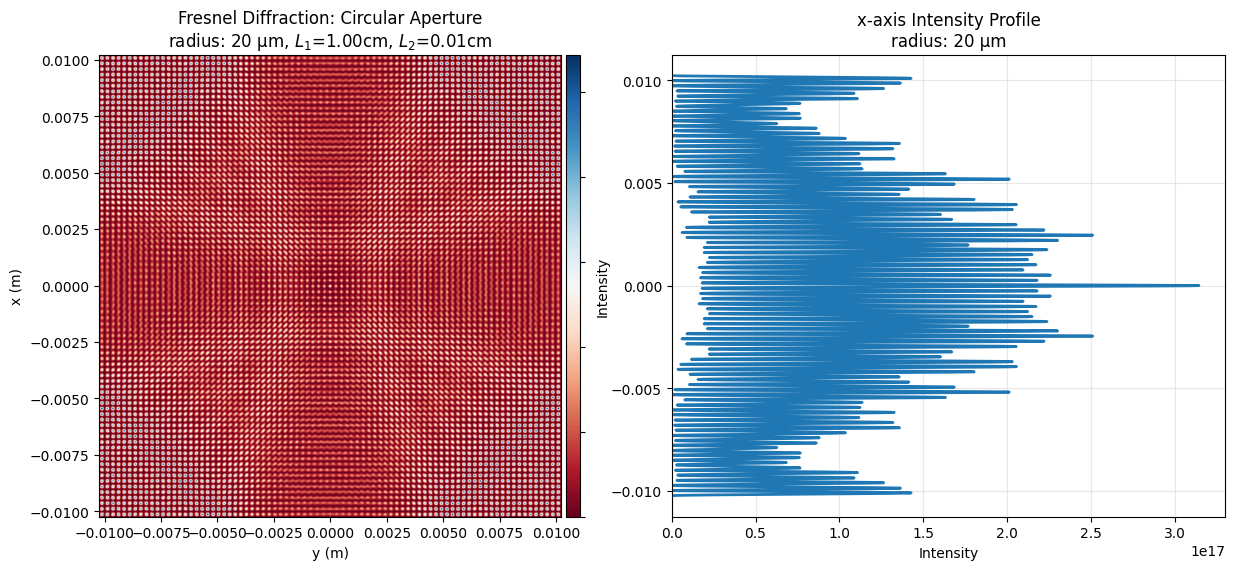

In [395]:
# 데이터 준비 ----------------------------------------------------------
rotated_pattern = np.rot90(spherical_wave_diffraction_pattern_aperture)  # 90도 회전

# x축 좌표 재계산 (FFT 기반)
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 실제 물리적 좌표

# y=0 인덱스 찾기
y = np.linspace(-screen_size/2, screen_size/2, N)
y_index = np.abs(y - 0).argmin()
intensity = spherical_wave_diffraction_intensity_aperture.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace 줄임

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='RdBu',
               aspect='equal',
               origin='lower')
ax1.set_title(f'Fresnel Diffraction: Circular Aperture\n'+f'radius: {radius*1000:.0f} μm, '+r'$L_1$='+f'{L1*10:.2f}cm, '+r'$L_2$='+f'{L2*10:.2f}cm', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바를 이미지 바로 옆에 붙이기 (더 가깝게)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)  # size와 pad 줄임
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])  # 숫자 레이블 제거

# 1차원 강도 그래프 (90도 회전) - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)  # x축: intensity, y축: x 좌표
ax2.set_xlim(left=0)
ax2.set_title(f'x-axis Intensity Profile\nradius: {radius*1000:.0f} μm', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 정사각형 개구에 의한 프레넬 회절 패턴

정사각형 개구 스펙을 입력하고, 정사각형 개구 마스크를 생성한다.
프레넬 회절 구현 함수에 구면파 광원과 정사각형 개구 마스크를 입력하고, 마스크과 스크린과의 거리 $L_2$ 를 입력한다.

#### 정사각형 개구 마스크 테스트
생성한 구면파와 정사각형 개구 마스크를 곱해 회절될 광원이 어떤 형태인지 확인한다.

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/3265462542.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1].imshow(square_mask.astype(float),


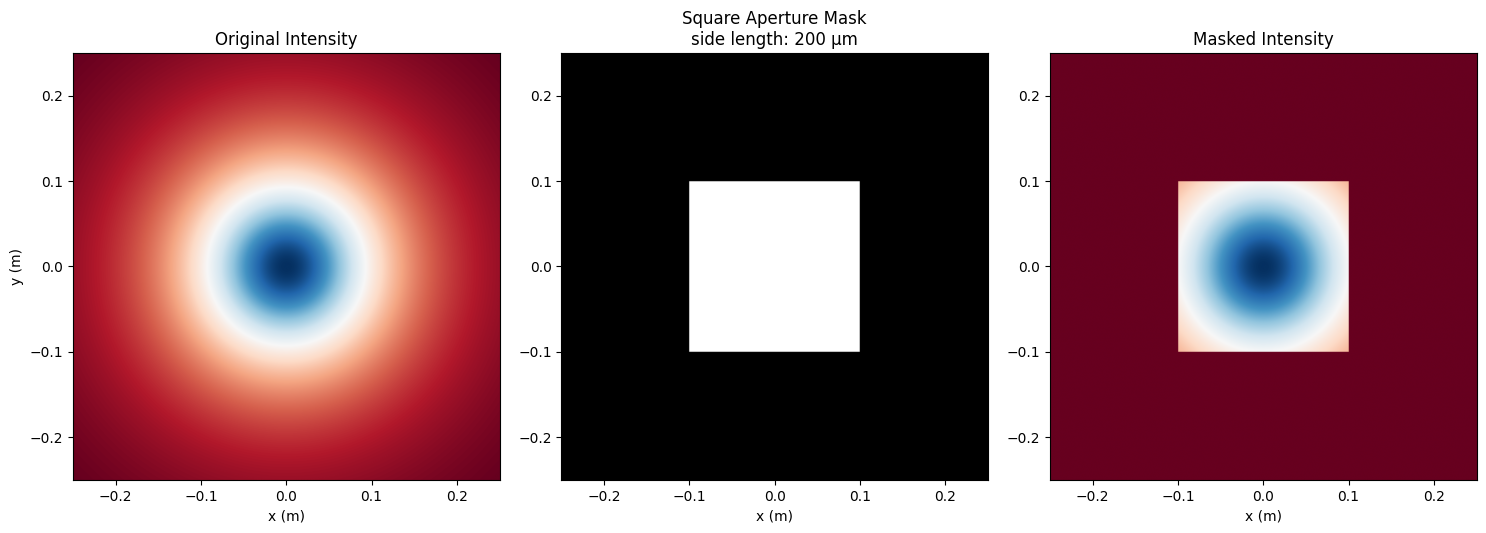

In [396]:
# 정사각형 개구 스펙
square_side = 0.2 # mm
square_center_x, square_center_y = 0.0, 0.0  # 정사각형 중심

# 정사각형 개구 마스크 생성
square_mask = create_square_mask(square_side, square_center_x, square_center_y, dtype=np.complex128)

# 프라운호퍼 회절 계산
spherical_wave_diffraction_yz_square, spherical_wave_masked_square , spherical_wave_diffraction_pattern_square, spherical_wave_diffraction_intensity_square ,y_mask_square, z_coords_square = fraunhofer_diffraction(spherical_wave_L1,square_mask,L2)

# 간단한 전후 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(-screen_size/2, screen_size/2, spherical_wave_L1.shape[0])
y = np.linspace(-screen_size/2, screen_size/2, spherical_wave_L1.shape[1])

# 원본 강도
axes[0].imshow(np.abs(spherical_wave_L1)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='RdBu', origin='lower')
axes[0].set_title('Original Intensity')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')

# 마스크
axes[1].imshow(square_mask.astype(float),
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='gray', origin='lower')
axes[1].set_title('Square Aperture Mask\n'+f'side length: {square_side*1000:.0f} μm')
axes[1].set_xlabel('x (m)')
# axes[1].set_ylabel('y (m)')

# 마스크 적용 후 강도
axes[2].imshow(np.abs(spherical_wave_masked_square)**2,
              extent=[x.min(), x.max(), y.min(), y.max()],
              cmap='RdBu', origin='lower')
axes[2].set_title('Masked Intensity')
axes[2].set_xlabel('x (m)')
# axes[2].set_ylabel('y (m)')

plt.tight_layout()
plt.show()


#### 정사각형 개구에 의한 프레넬 회절패턴

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_44418/2145517355.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


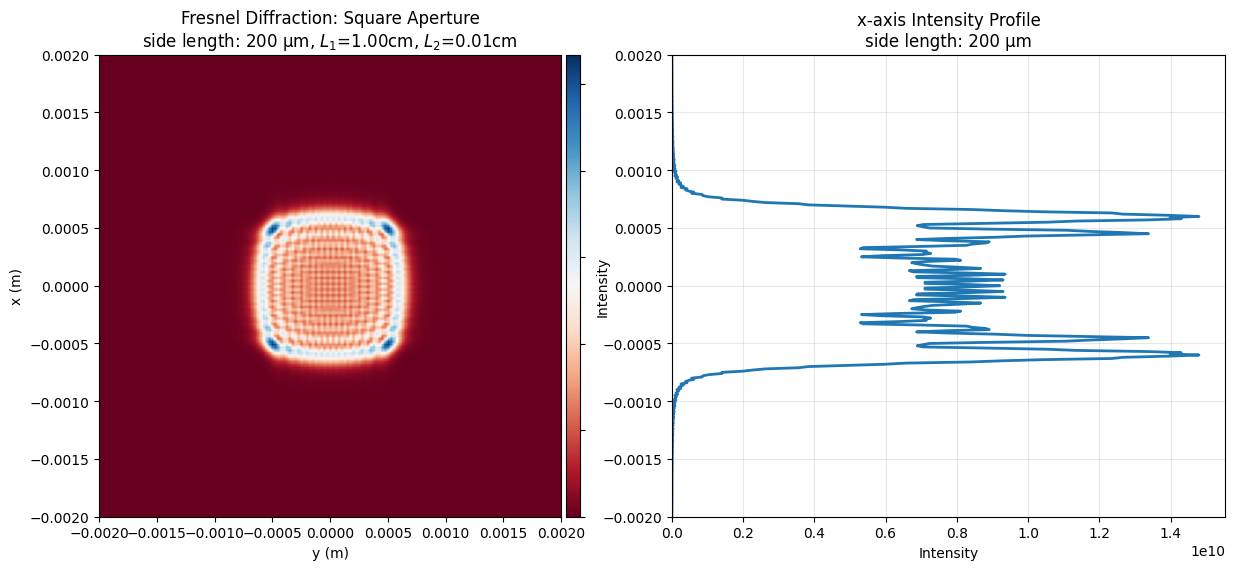

In [397]:
# 데이터 준비 ----------------------------------------------------------
rotated_pattern = np.rot90(spherical_wave_diffraction_pattern_square)  # 90도 회전

# x축 좌표 재계산 (FFT 기반)
dx = screen_size / N
fx = np.fft.fftshift(np.fft.fftfreq(N, dx))
x = fx * wavelength * L2  # 실제 물리적 좌표

# y=0 인덱스 찾기
y = np.linspace(-screen_size/2, screen_size/2, N)
y_index = np.abs(y - 0).argmin()
intensity = spherical_wave_diffraction_intensity_square.real

# 시각화 설정 ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace 줄임

a = 0.002

# 스크린 패턴 (90도 회전) - 왼쪽
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(rotated_pattern,
               extent=[x.min(), x.max(), x.min(), x.max()],
               cmap='RdBu',
               aspect='equal',
               origin='lower')
ax1.set_xlim(-a, a)
ax1.set_ylim(-a, a)
ax1.set_title(f'Fresnel Diffraction: Square Aperture\n'+f'side length: {square_side*1000:.0f} μm, '+r'$L_1$='+f'{L1*10:.2f}cm, '+r'$L_2$='+f'{L2*10:.2f}cm', fontsize=12)
ax1.set_xlabel('y (m)', fontsize=10)
ax1.set_ylabel('x (m)', fontsize=10)

# 컬러바를 이미지 바로 옆에 붙이기 (더 가깝게)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.05)  # size와 pad 줄임
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Intensity', fontsize=10)
cbar.ax.set_yticklabels([])  # 숫자 레이블 제거

# 1차원 강도 그래프 (90도 회전) - 오른쪽  
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(intensity, x, linewidth=2)  # x축: intensity, y축: x 좌표
ax2.set_xlim(left=0)
ax2.set_ylim(-a, a)  # 실제 x 범위로 설정
ax2.set_title(f'x-axis Intensity Profile\nside length: {square_side*1000:.0f} μm', fontsize=12)
ax2.set_xlabel('Intensity', fontsize=10)
# ax2.set_ylabel('x (m)', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
